This notebook is designed to test the inference API. I will load continious waveform from our dataset, and make a post call to see if the API is working.

In [1]:
import h5py
import httpx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f=h5py.File("../dataset/waveform.h5","r")

In [3]:
net,sta="11_52111","A01"
data=f[net][sta]
for key,val in data.attrs.items():
    print(key,val)

azimuth 261.40685527899217
back_azimuth 81.63077771907837
begin_time 2009-12-02T01:10:41.317870
component ['1' '2' 'Z']
distance_km 64.03723091735361
dt_s 0.025
elevation_m -1059.0
end_time 2009-12-02T01:20:41.317870
event_id 11_52111
latitude -21.533899
local_depth_m 0.0
location 
longitude -175.623505
network YL
phase_index [ 9600 10001]
phase_polarity ['N' 'N']
phase_score [1 1]
phase_time ['2009-12-02T01:14:41.317870' '2009-12-02T01:14:51.343700']
phase_type ['P' 'S']
snr [5.20634372 8.18201576 9.42164388]
station A01
takeoff_angle 124.5301244813764
unit m/s


In [10]:
id=[f"{net}.{sta}"]
timestamp=[f"{data.attrs['begin_time']}"]
vec=[data[...].tolist()]
extract_phases=["P","S"]
extract_phase_sensitivity=[0.5,0.5]

headers = {
    'Content-Type': 'application/json'
}

request_body={
    "id":id,
    "timestamp":timestamp,
    "vec":vec,
    "extract_phases":extract_phases,
    "extract_phase_sensitivity":extract_phase_sensitivity
}

In [11]:
url = "http://0.0.0.0:8080/predict"
response = httpx.post(url, headers=headers, json=request_body,timeout=600)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    print("Request was successful!")
    print("Response:", response.json())
else:
    print("Request failed with status code:", response.status_code)

Request was successful!
Response: {'id': ['11_52111.A01'], 'possibility': [{'noise': [0.999862551689148, 0.9999445676803589, 0.9999758005142212, 0.9999890327453613, 0.9999948740005493, 0.9999935626983643, 0.9999920129776001, 0.9999899864196777, 0.9999873638153076, 0.999984622001648, 0.999981164932251, 0.9999768733978271, 0.999971866607666, 0.9999648332595825, 0.9999561309814453, 0.9999450445175171, 0.9999314546585083, 0.999919056892395, 0.9999045133590698, 0.9998871088027954, 0.9998666048049927, 0.9998457431793213, 0.9998216032981873, 0.9997933506965637, 0.9997604489326477, 0.9997281432151794, 0.9996914863586426, 0.999648928642273, 0.9996002316474915, 0.9995560050010681, 0.9995055198669434, 0.9994476437568665, 0.999382734298706, 0.9993342757225037, 0.9992814660072327, 0.9992233514785767, 0.999159574508667, 0.9990911483764648, 0.9990172386169434, 0.998936116695404, 0.998847246170044, 0.9987680315971375, 0.9986827969551086, 0.9985905289649963, 0.998490571975708, 0.9984322190284729, 0.998

['11_52111.A01']
[{'noise': [0.9998749494552612, 0.9999299049377441, 0.9999592304229736, 0.9999760389328003, 0.999985933303833, 0.9999850988388062, 0.9999842643737793, 0.9999833106994629, 0.9999819993972778, 0.9999806880950928, 0.9999793767929077, 0.9999778270721436, 0.9999760389328003, 0.9999721050262451, 0.9999675750732422, 0.9999620914459229, 0.999955415725708, 0.9999508857727051, 0.9999456405639648, 0.9999397993087769, 0.9999332427978516, 0.9999253749847412, 0.9999163150787354, 0.9999063014984131, 0.9998952150344849, 0.9998843669891357, 0.9998724460601807, 0.9998592138290405, 0.9998446702957153, 0.9998311996459961, 0.9998164772987366, 0.9998003840446472, 0.9997829794883728, 0.9997555613517761, 0.9997245669364929, 0.9996896982192993, 0.9996503591537476, 0.9995929598808289, 0.9995238780975342, 0.9994428753852844, 0.9993485808372498, 0.9992486834526062, 0.9991336464881897, 0.9990012049674988, 0.998847484588623, 0.9987766146659851, 0.99870765209198, 0.9986345171928406, 0.99855715036392

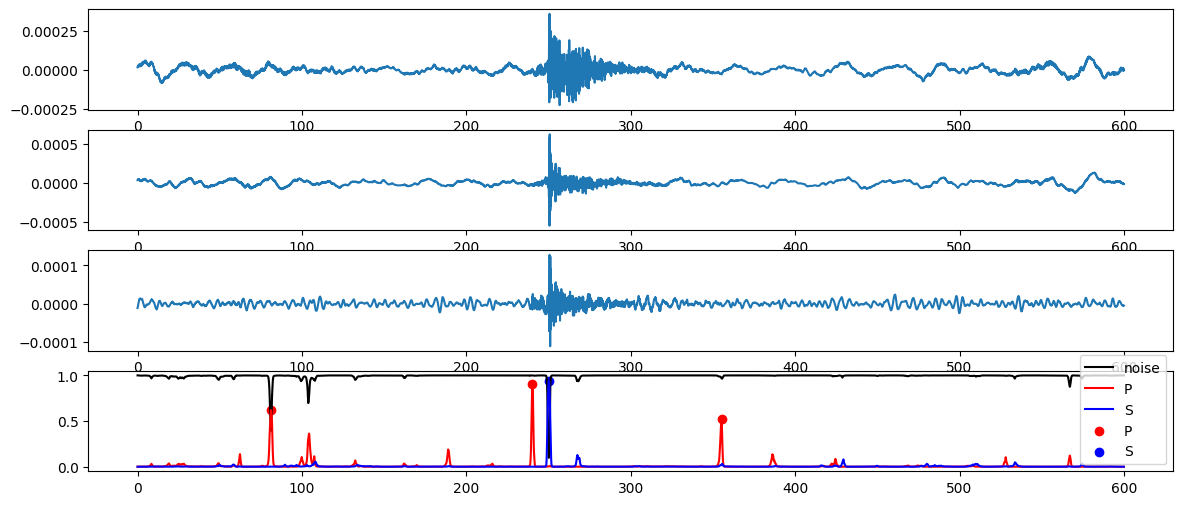

In [6]:
def show_response(request,response):
    res=response.json()
    print(res["id"])
    print(res["possibility"])
    print(res["arrivals"])
    print(res["amps"])
    print(res["arrival_times"])

    # plot
    fig,ax=plt.subplots(4,1,figsize=(14,6))
    # plot waveform
    dt_s=0.025
    x=np.arange(0,len(request["vec"][0][0]))*dt_s
    ax[0].plot(x,request["vec"][0][0])
    ax[1].plot(x,request["vec"][0][1])
    ax[2].plot(x,request["vec"][0][2])
    colors={
        "noise":"black",
        "P":"red",
        "S":"blue",
    }
    # plot possibility
    for phase in res["possibility"][0].keys():
        ax[3].plot(x,res["possibility"][0][phase],label=phase,color=colors[phase])
    ax[3].legend()
    # plot arrival
    for phase in res["arrivals"][0].keys():
        ax[3].scatter(np.array(res["arrivals"][0][phase])*dt_s,res["amps"][0][phase],label=phase,color=colors[phase])
    ax[3].legend()
    plt.show()


show_response(request_body,response)